In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [3]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [4]:
y.index = y.name

In [5]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [6]:
y.index = pd.to_datetime(y.index)

In [7]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)

# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [8]:
from pytrends.request import TrendReq

In [9]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ['Stock Market', "Inflation", 'FED', 'Interest Rates', 'Bear Market', 'Bull Market', 'Fifa', 'Army', 'Banana']  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [10]:
X = df.resample("Q").mean()

In [11]:
# ALIGN DATA
temp = pd.concat([y, X],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

In [19]:
X.head()

,Stock Market,Inflation,FED,Interest Rates,Bear Market,Bull Market,Fifa,Army,Banana
2004-03-31,20.333333,47.000000,59.333333,61.666667,12.000000,22.666667,5.333333,96.000000,36.000000
2004-06-30,16.666667,43.333333,63.000000,66.000000,14.000000,26.333333,5.666667,95.333333,37.333333
2004-09-30,14.000000,36.000000,68.666667,53.333333,13.000000,18.000000,5.333333,89.666667,37.000000
2004-12-31,17.666667,39.000000,70.000000,46.000000,12.666667,19.666667,8.333333,91.333333,43.000000
2005-03-31,19.333333,39.000000,65.666667,47.666667,16.000000,20.333333,6.666667,84.000000,40.666667


# 3.) Normalize all the X data

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [13]:
from sklearn.linear_model import Lasso

In [14]:
Lasso = Lasso(alpha = 0.5)

In [15]:
Lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [16]:
coefficients = Lasso.coef_

In [20]:
coefficients

array([ 0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.])

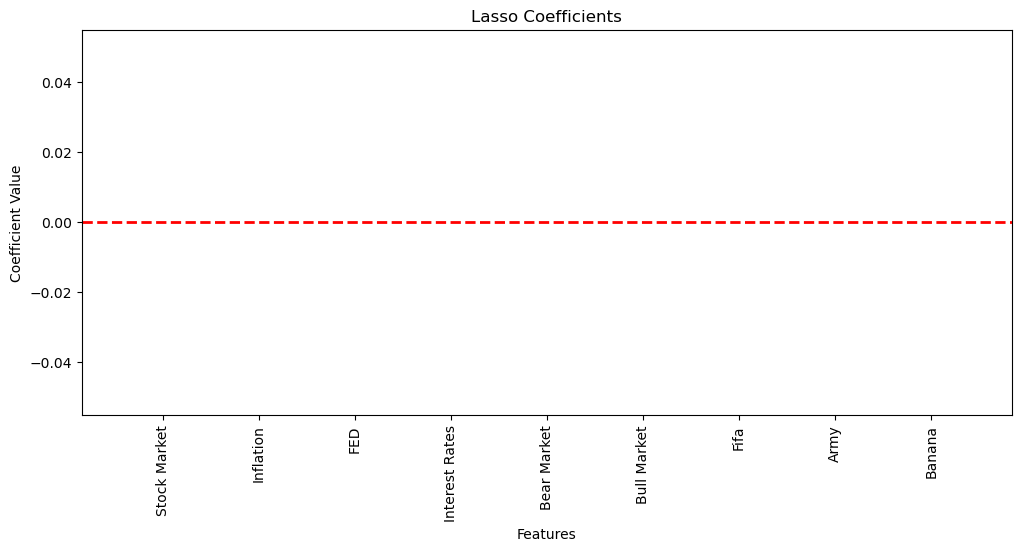

In [17]:
plt.figure(figsize=(12, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), X.columns, rotation='vertical')  
plt.axhline(0, color="red", linestyle="--", linewidth=2)
plt.title('Lasso Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.show()


# 5.) Do these coefficient magnitudes make sense?

- Lasso regression with a lambda of 0.5 resulted in all coefficients being zero for Google Trends search terms.
- This suggests that none of the selected terms significantly impact nowcasting Apple's earnings.